In [5]:
import os
if not os.path.exists(os.path.join("runs", "predict")):
    os.makedirs(os.path.join("runs", "predict"))

Weights loaded successfully from path: weights/weights.pt


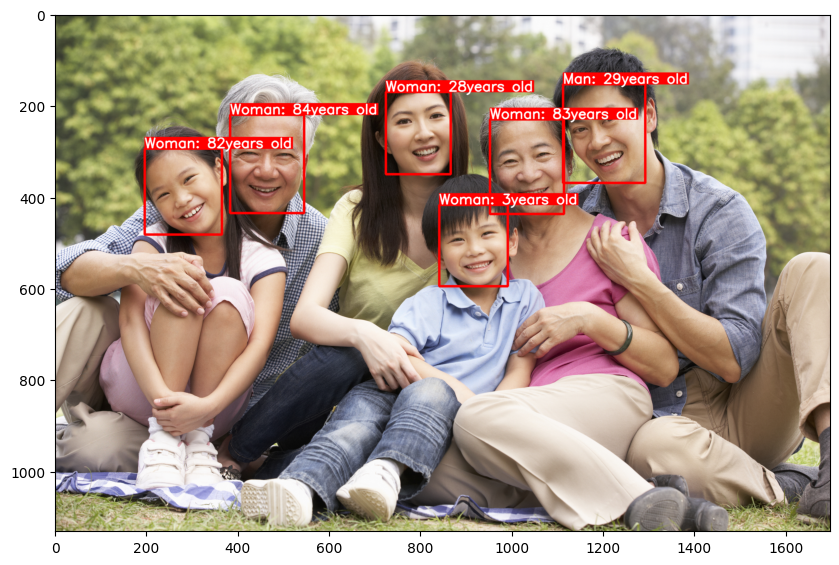

In [2]:
from predict import AgeEstimator 
import torch
import matplotlib.pyplot as plt
filename = "Images/asian_family2.jpg"
model = AgeEstimator(weights = "weights/weights.pt")
predicted_image = model.predict(filename)
plt.figure(figsize = (10,8))
plt.imshow(predicted_image)

In [3]:
plt.imsave('results/asian_family.jpg', predicted_image)